# Single Band Statistics via Sentinel-Hub Statistical API

In [1]:
import os
import yaml
from munch import munchify

### _Setup configuration and environment_

In [2]:
# define repo name and get root working directory
repo = 'statistical-api'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]

# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )

In [3]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'sentinel-2' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\statistical-api\\cfg\\sentinel-2'

In [4]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 's2-band4-default.yml' )

In [5]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |       
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: [
                                "B04",
                                "dataMask"
                            ]
                        }],
                        output: [
                        {
                            id: "output_B04",
                            bands: 1,
                            sampleType: "FLOAT32"
                        },
                        {
                            id: "dataMask",
                            bands: 1
                        } ]
                    }
                }
                function evaluatePixel(samples) {
                    return {
                        output_B04: [samples.B04],
                        dataMask: [samples.dataMask]
                    }
                }    
    inputs:
        - collection: SENTIN

In [6]:
# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )
config

Munch({'request': Munch({'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: [\n                "B04",\n                "dataMask"\n            ]\n        }],\n        output: [\n        {\n            id: "output_B04",\n            bands: 1,\n            sampleType: "FLOAT32"\n        },\n        {\n            id: "dataMask",\n            bands: 1\n        } ]\n    }\n}\nfunction evaluatePixel(samples) {\n    return {\n        output_B04: [samples.B04],\n        dataMask: [samples.dataMask]\n    }\n}    \n', 'inputs': [Munch({'collection': 'SENTINEL2_L2A', 'mosaic': Munch({'order': 'leastRecent'})})]}), 'responses': None})

### _Replicate use case results taken from Sentinel-Hub documentation_

In [7]:
from sentinelhub import CRS

# define min and max latlons
coords = 414315, 4958219, 414859, 4958819
crs = CRS( 32633 )

resolution = 10

In [8]:
# define aggregation timeframe
from datetime import datetime
timeframe = { 'start' : datetime.strptime('2020-07-04', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-07-05', '%Y-%m-%d') }

In [9]:
# create instance of shclient class
from statisticalapi import Client
client = Client( config )

In [10]:
# get utm bbox
bbox = client.getBoundingBox( coords, src_crs=crs )
print ( bbox, bbox.crs.value )

414315.0,4958219.0,414859.0,4958819.0 32633


In [11]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=resolution, bbox=bbox )

In [12]:
response._dfs[ 0 ]

,interval_from,interval_to,output_B04_B0_min,output_B04_B0_max,output_B04_B0_mean,output_B04_B0_stDev,output_B04_B0_sampleCount,output_B04_B0_noDataCount
0,2020-07-04,2020-07-05,0.0797,0.3096,0.114711,0.034298,3240,0


### _Repeat Statistical API request with coarser pixel resolution_

In [13]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=50, bbox=bbox )

In [14]:
response._dfs[ 0 ]

,interval_from,interval_to,output_B04_B0_min,output_B04_B0_max,output_B04_B0_mean,output_B04_B0_stDev,output_B04_B0_sampleCount,output_B04_B0_noDataCount
0,2020-07-04,2020-07-05,0.0812,0.2311,0.112804,0.03091,132,0


### _Repeat Statistical API request for summer of 2020_

In [15]:
# define aggregation timeframe
timeframe = { 'start' : datetime.strptime('2020-06-01', '%Y-%m-%d'), 
              'end' : datetime.strptime('2020-08-31', '%Y-%m-%d') }

In [16]:
# submit request
response = client.getStatistics( [ timeframe ], resolution=10, bbox=bbox, interval="P1D" )

In [17]:
response._dfs[ 0 ]

,interval_from,interval_to,output_B04_B0_min,output_B04_B0_max,output_B04_B0_mean,output_B04_B0_stDev,output_B04_B0_sampleCount,output_B04_B0_noDataCount
0,2020-06-04,2020-06-05,0.7892,0.8304,0.804224,0.006707,3240,0
1,2020-06-09,2020-06-10,0.4916,0.5932,0.534112,0.022862,3240,0
2,2020-06-14,2020-06-15,0.0163,0.5956,0.062401,0.062665,3240,0
3,2020-06-19,2020-06-20,0.0087,0.3570,0.046999,0.053215,3240,0
4,2020-06-24,2020-06-25,0.0260,0.4380,0.068724,0.056520,3240,0
5,2020-06-29,2020-06-30,0.0091,0.4364,0.063135,0.059460,3240,0
6,2020-07-04,2020-07-05,0.0797,0.3096,0.114711,0.034298,3240,0
7,2020-07-09,2020-07-10,0.0068,0.4050,0.055712,0.063567,3240,0
8,2020-07-14,2020-07-15,0.0174,0.4188,0.062195,0.063177,3240,0
9,2020-07-19,2020-07-20,0.0039,0.4196,0.053526,0.066718,3240,0


<AxesSubplot:xlabel='interval_from'>

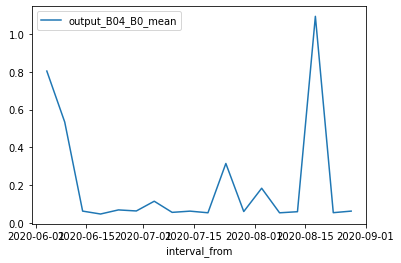

In [18]:
response._dfs[ 0 ].plot( 'interval_from', 'output_B04_B0_mean' )